In [1]:
import os

from src.utils import working_directory_to_src
working_directory_to_src()   # run this only once after starting the kernel.

Path set to : /Users/aakashsingh/Documents/Developer/spring-2026-group4/src


1

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils import read_yaml, read_jsonl, remove_outliers
from tqdm import tqdm
config = read_yaml('config.yaml')
config

{'DATA_FOLDER': '../data',
 'NEWS_FOLDER': '../data/multi-modal-dataset/sp500_news'}

In [3]:
list_of_tickers = os.listdir(config["NEWS_FOLDER"])
list_of_tickers.sort()
number_of_tickers = len(list_of_tickers)
print("Number of Tickers:", number_of_tickers)

Number of Tickers: 4694


## Number of articles per Ticker

In [4]:
ticker_n_articles = {}
for ticker in tqdm(list_of_tickers):
    data = read_jsonl(os.path.join(config["NEWS_FOLDER"], ticker))
    ticker_n_articles[ticker] = len(data)


100%|██████████| 4694/4694 [01:04<00:00, 72.34it/s] 


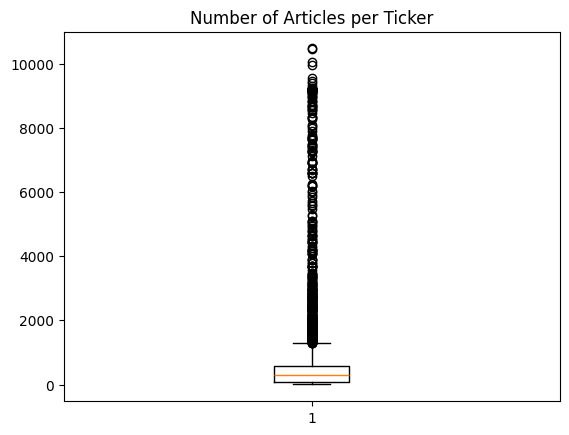

In [5]:
plt.boxplot(ticker_n_articles.values())
plt.title("Number of Articles per Ticker")
plt.show()

25% : 85.0 75%: 572.0


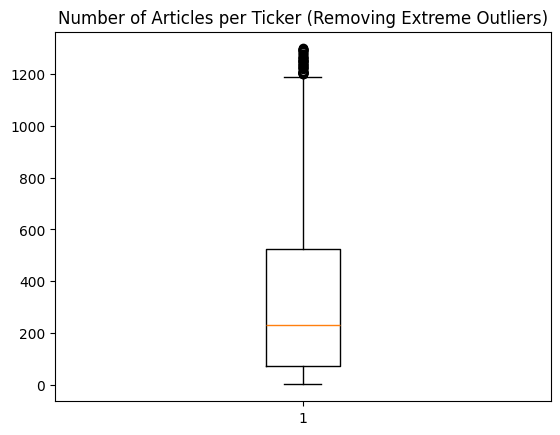

In [6]:
plt.boxplot(remove_outliers(list(ticker_n_articles.values())))
plt.title("Number of Articles per Ticker (Removing Extreme Outliers)")
plt.show()

## K tickers with most and least count

In [7]:
def remove_jsonl_from_ticker(ticker):
    ticker = ticker.replace(".jsonl", '')
    return ticker

In [8]:
k = 10
ticker_n_articles = dict(sorted(ticker_n_articles.items(), key=lambda item: item[1],  reverse=True))
top_k_tickers  = list(ticker_n_articles.keys())[:k]
bottom_k_tickers = list(ticker_n_articles.keys())[-k:]
# top_k_tickers = [remove_jsonl_from_ticker(ticker) for ticker in top_k_tickers]
# bottom_k_tickers = [remove_jsonl_from_ticker(ticker) for ticker in bottom_k_tickers]

100%|██████████| 10/10 [00:00<00:00, 213995.10it/s]


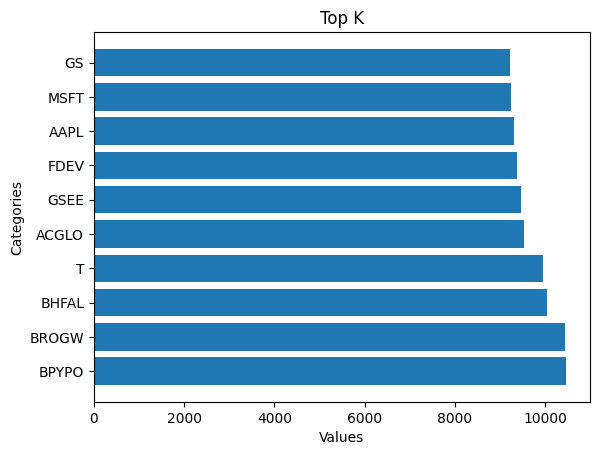

In [9]:
# top K
top_k_values= []
for ticker in tqdm(top_k_tickers):
    top_k_values.append(ticker_n_articles[ticker])

plt.barh([remove_jsonl_from_ticker(ticker) for ticker in top_k_tickers], top_k_values)
plt.xlabel("Values")
plt.ylabel("Categories")
plt.title("Top K")
plt.show()

100%|██████████| 10/10 [00:00<00:00, 195995.51it/s]


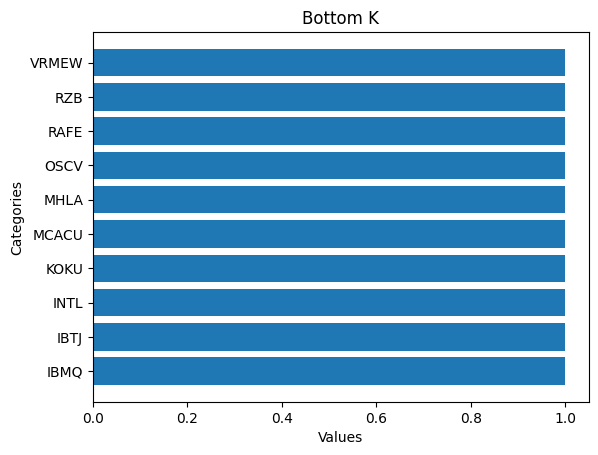

In [10]:
# bottom K
bottom_k_values= []
for ticker in tqdm(bottom_k_tickers):
    bottom_k_values.append(ticker_n_articles[ticker])

plt.barh([remove_jsonl_from_ticker(ticker) for ticker in bottom_k_tickers], bottom_k_values)
plt.xlabel("Values")
plt.ylabel("Categories")
plt.title("Bottom K")
plt.show()